In [ ]:
#!pip install shap
#!pip install -e .

### Task ?

specified that I do not intend to optimize the parameter \( k \) this time, but rather to document the results for each value of \( k \). Specifically, goal is to visualize importance measures—MDI and SHAP included—as functions of \( k \), while keeping the `max_features` parameter at its default setting. There is no need to optimize for ROC AUC scores; however, want these scores recorded for each \( k \). Furthermore, for each level of feature relevance, aim to produce a set of four plots that illustrate these metrics.

In [3]:
import warnings
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from TreeModelsFromScratch.RandomForest import RandomForest
from utils import simulate_data_strobl
from matplotlib import pyplot as plt

#### With K and Max Feature = Default - Custom RF

In [7]:
def calculate_auc_roc(y_true, y_scores):
    """Calculate the AUC-ROC score."""
    return roc_auc_score(y_true, y_scores)

def evaluate_models(k_values=range(1, 31), iterations=20, n_trees=100,
                    relevance=0.15, depth_dof=False, verbose = 1):
    results = []
    for k in range(0, 31):
        roc_aucs, mdi_importances, shap_values_all = [], [], []
        for _ in range(iterations):
            # Generate new data for each iteration
            X, y = simulate_data_strobl(n=300, relevance=relevance)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

            # Initialize and fit the model
            model = RandomForest(treetype="classification", n_trees=n_trees, k=k, oob_SHAP=True, depth_dof=depth_dof)
            model.fit(X_train, y_train)
            y_scores = model.predict_proba(X_test)[:, 1]
            roc_aucs.append(calculate_auc_roc(y_test, y_scores))
            mdi_importances.append(model.feature_importances_)
            shap_values_all.append(np.mean(np.abs(model.oob_SHAP_values), axis=0))

        results.append({
            'k': k,
            'roc_auc': np.mean(roc_aucs),
            'mdi_importances': np.mean(mdi_importances, axis=0),
            'shap_values': np.mean(shap_values_all, axis=0)
        })
        if verbose:
            print("done with k",k)
    return results

In [8]:
warnings.filterwarnings('ignore')

relevance_values = [0, 0.05, 0.1, 0.15, 0.2]
all_results = []

for relevance in relevance_values:
    # Evaluate models for each relevance level
    results = evaluate_models(relevance) # Use iteration 20
    print("done with relevance",relevance)
    all_results.append({'relevance': relevance, 'results': results})

# Save results to a pickle file
with open('evaluation_results.pkl', 'wb') as file:
    pickle.dump(all_results, file)

KeyboardInterrupt: 

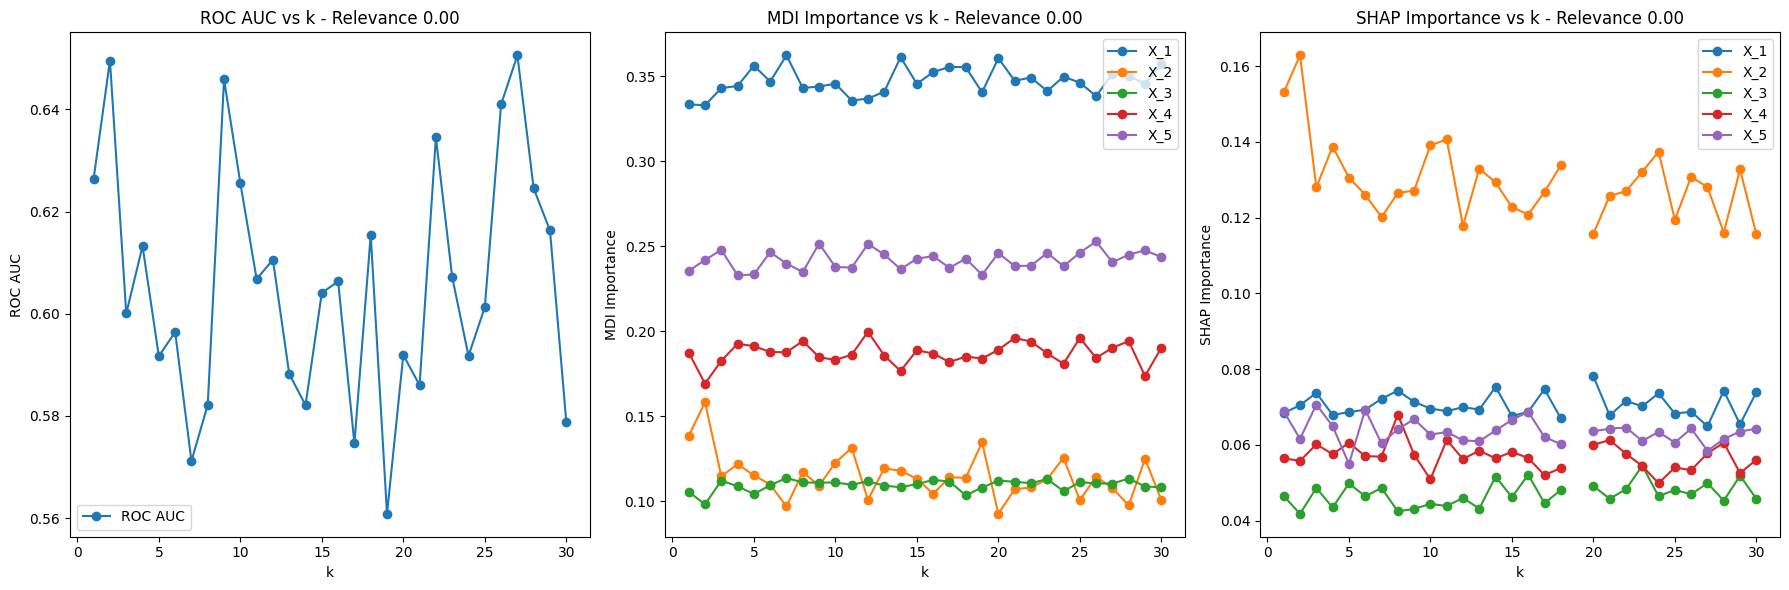

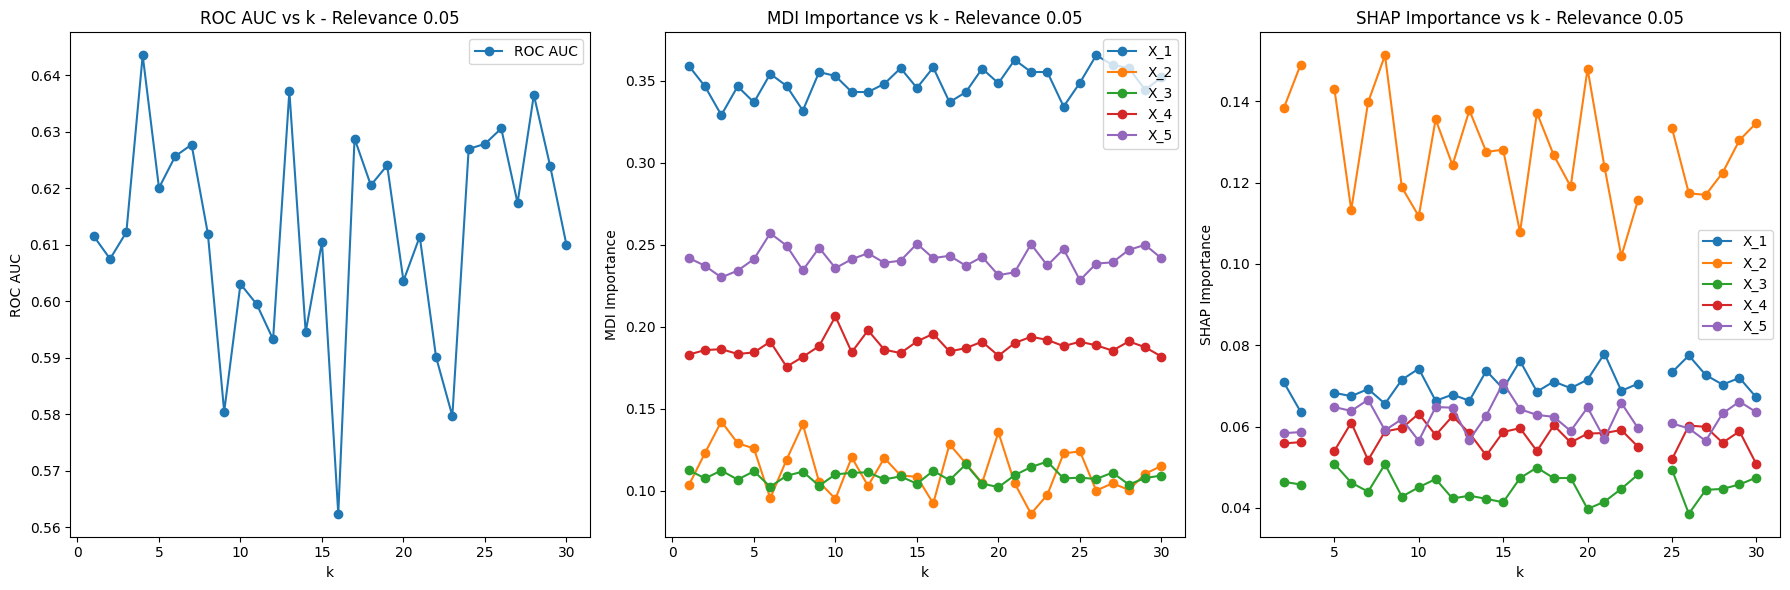

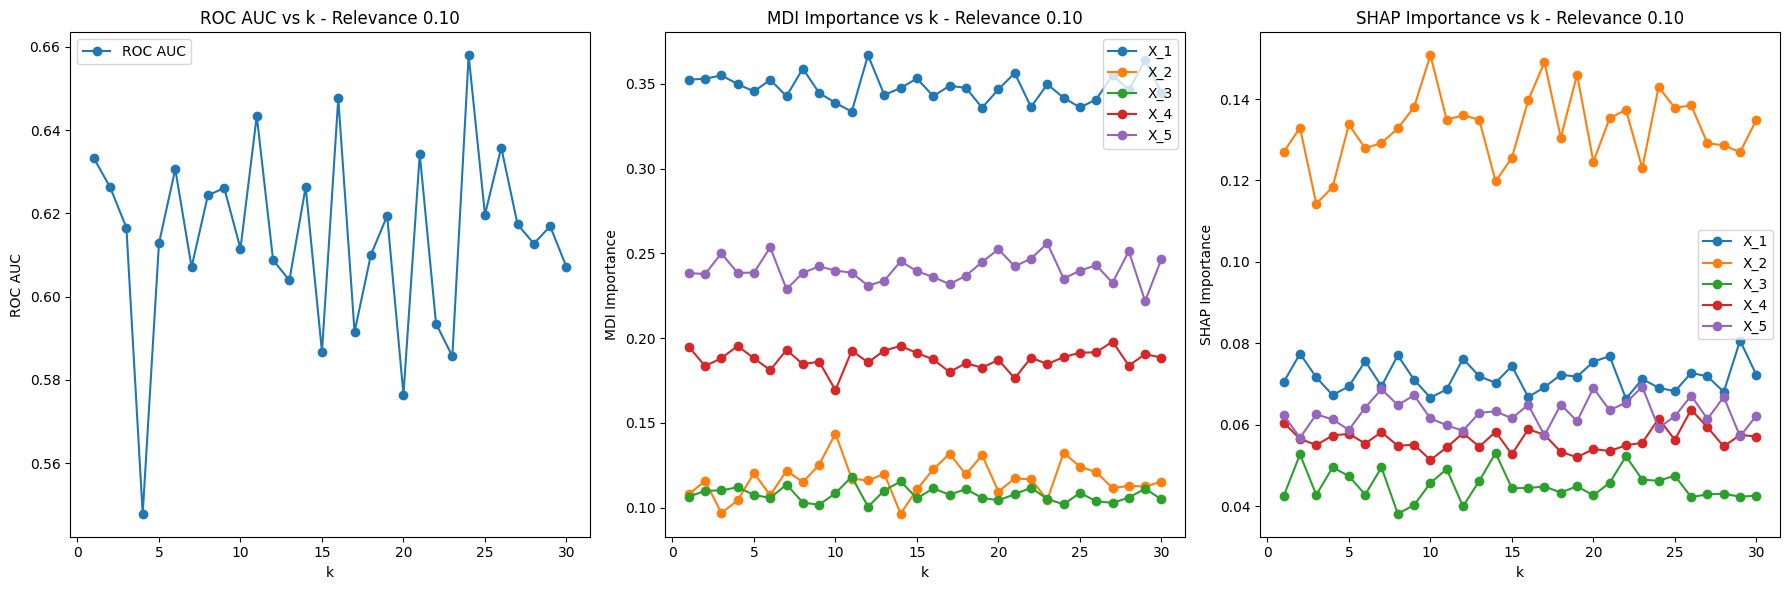

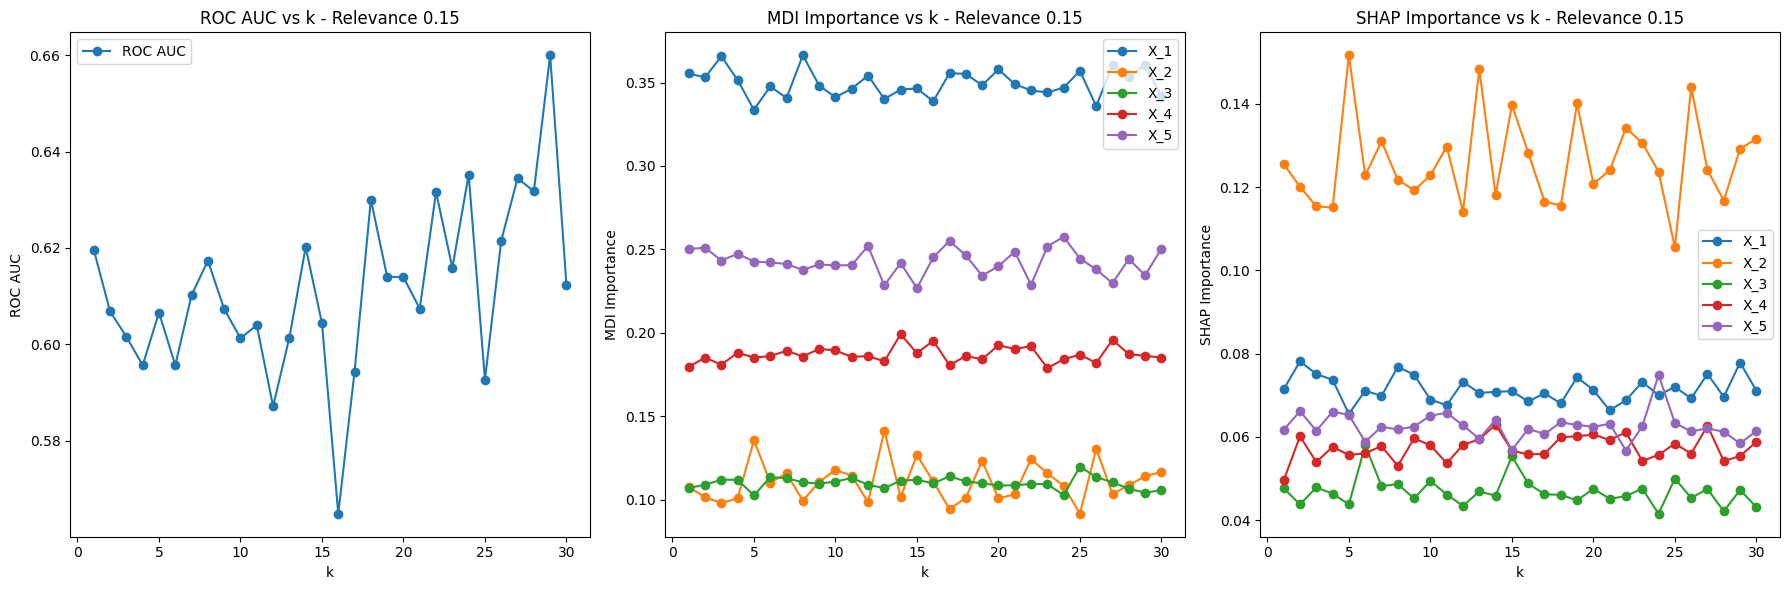

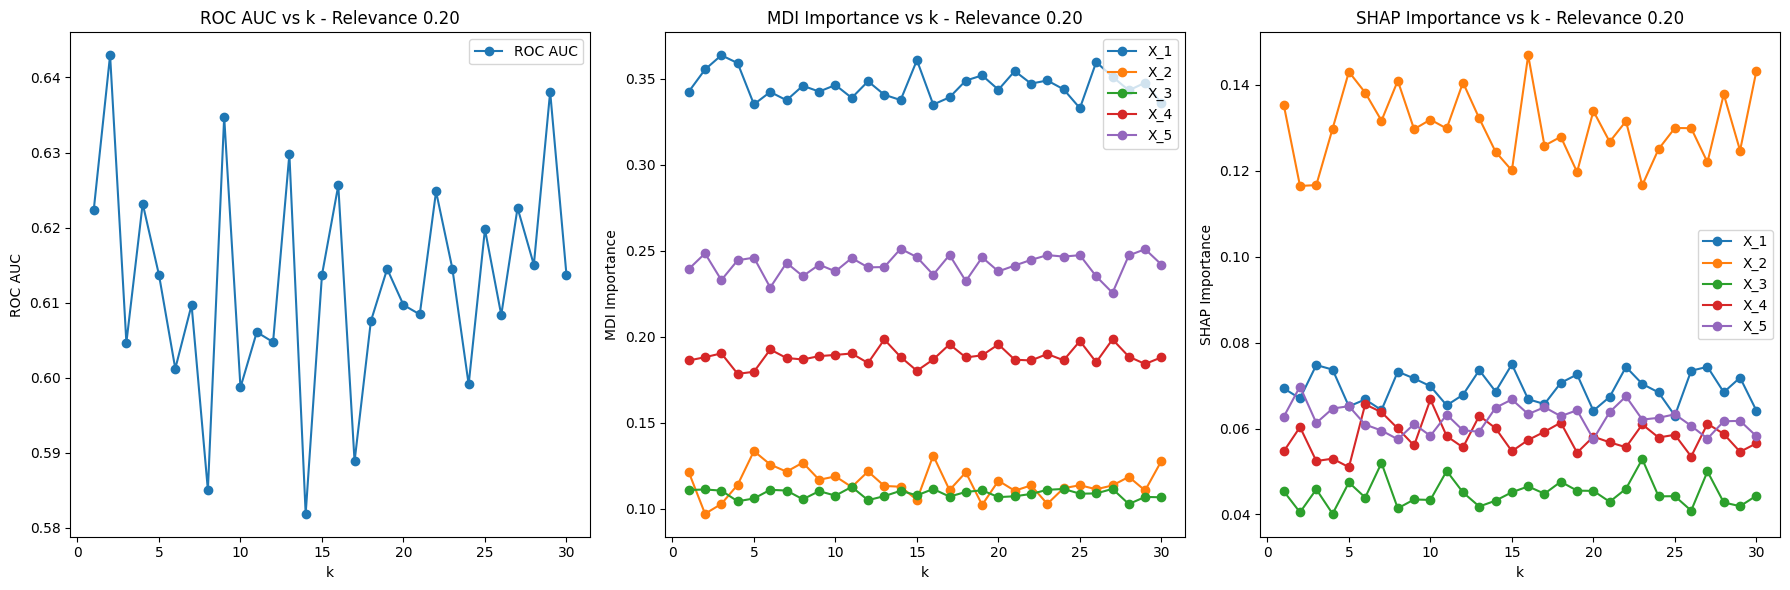

In [8]:
# Plotting results with revised legends and titles
for relevance_result in all_results:
    relevance = relevance_result['relevance']
    plt.figure(figsize=(18, 6))

    ks = [result['k'] for result in relevance_result['results']]
    rocs = [result['roc_auc'] for result in relevance_result['results']]
    mdi_importances = [result['mdi_importances'] for result in relevance_result['results']]
    shap_importances = [result['shap_values'] for result in relevance_result['results']]

    plt.subplot(1, 3, 1)
    plt.plot(ks, rocs, label=f'ROC AUC', marker="o")
    plt.title(f'ROC AUC vs k - Relevance {relevance:.2f}')
    plt.xlabel('k')
    plt.ylabel('ROC AUC')
    plt.legend()

    plt.subplot(1, 3, 2)
    for feature_idx in range(mdi_importances[0].shape[0]):
        mdi_feature_means = [mdi[feature_idx] for mdi in mdi_importances]
        plt.plot(ks, mdi_feature_means, label=f'X_{feature_idx + 1}', marker="o")
    plt.title(f'MDI Importance vs k - Relevance {relevance:.2f}')
    plt.xlabel('k')
    plt.ylabel('MDI Importance')
    plt.legend()

    plt.subplot(1, 3, 3)
    for feature_idx in range(shap_importances[0].shape[0]):
        shap_feature_means = [shap[feature_idx] for shap in shap_importances]
        plt.plot(ks, shap_feature_means, label=f'X_{feature_idx + 1}', marker="o")
    plt.title(f'SHAP Importance vs k - Relevance {relevance:.2f}')
    plt.xlabel('k')
    plt.ylabel('SHAP Importance')
    plt.legend()

    plt.tight_layout()
    plt.show()

### With Depth and K - > depth = True

In [9]:
warnings.filterwarnings('ignore')

relevance_values = [0, 0.05, 0.1, 0.15, 0.2]
all_results = []

for relevance in relevance_values:
    # Evaluate models for each relevance level
    results = evaluate_models(relevance, depth_dof=True)
    all_results.append({'relevance': relevance, 'results': results})

# Save results to a pickle file
with open('evaluation_results.pkl', 'wb') as file:
    pickle.dump(all_results, file)

/content/TreeBasedModel/TreeModelsFromScratch/RandomForest.py:281: UserWarning: 1 out of 210 samples do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates. These samples were dropped before computing the oob_score
  warn(message)
/content/TreeBasedModel/TreeModelsFromScratch/RandomForest.py:304: RuntimeWarning: Mean of empty slice
  self.oob_SHAP_values = np.nanmean(shap_scores_oob, axis=2)
/content/TreeBasedModel/TreeModelsFromScratch/RandomForest.py:281: UserWarning: 1 out of 210 samples do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates. These samples were dropped before computing the oob_score
  warn(message)
/content/TreeBasedModel/TreeModelsFromScratch/RandomForest.py:304: RuntimeWarning: Mean of empty slice
  self.oob_SHAP_values = np.nanmean(shap_scores_oob, axis=2)
/content/TreeBasedModel/TreeModelsFromScratch/RandomForest.py:281: UserWarning: 1 out of 210 samples do not 

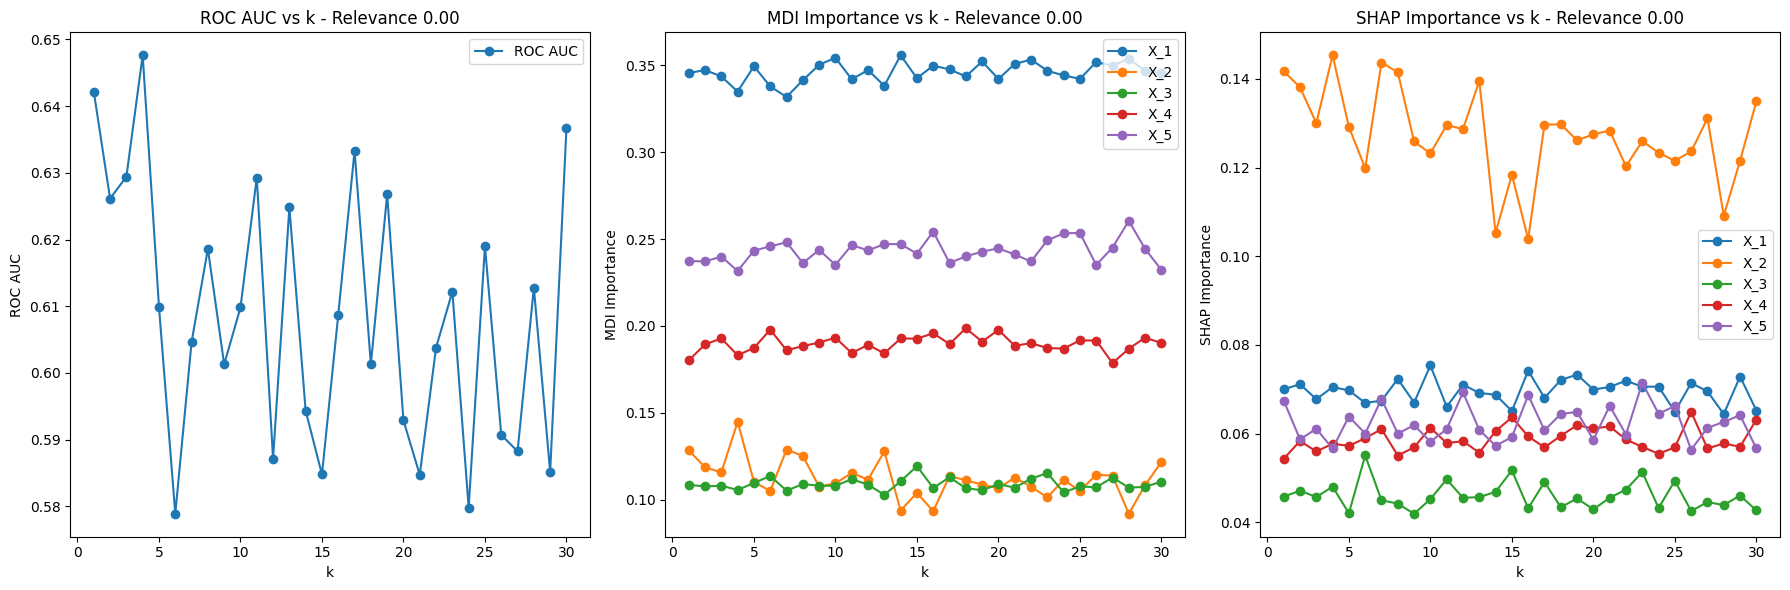

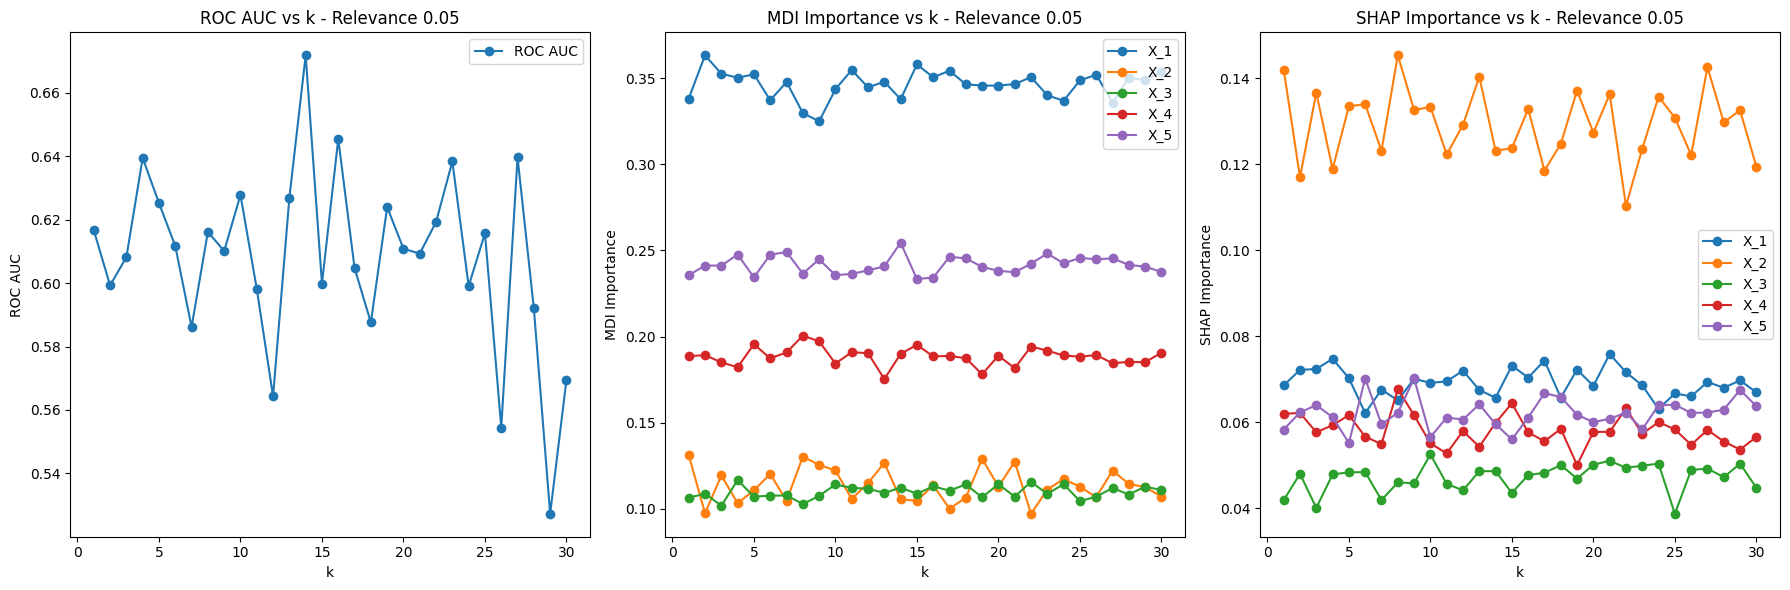

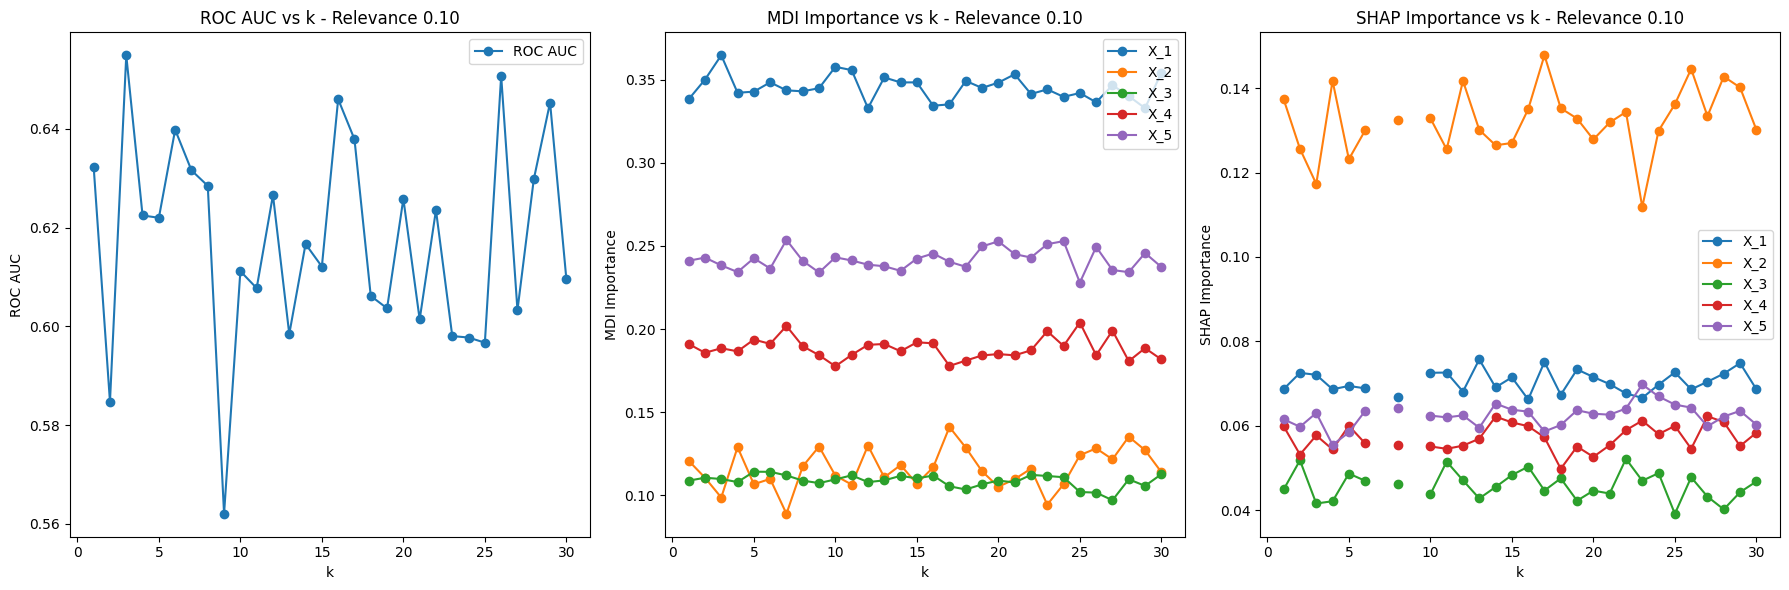

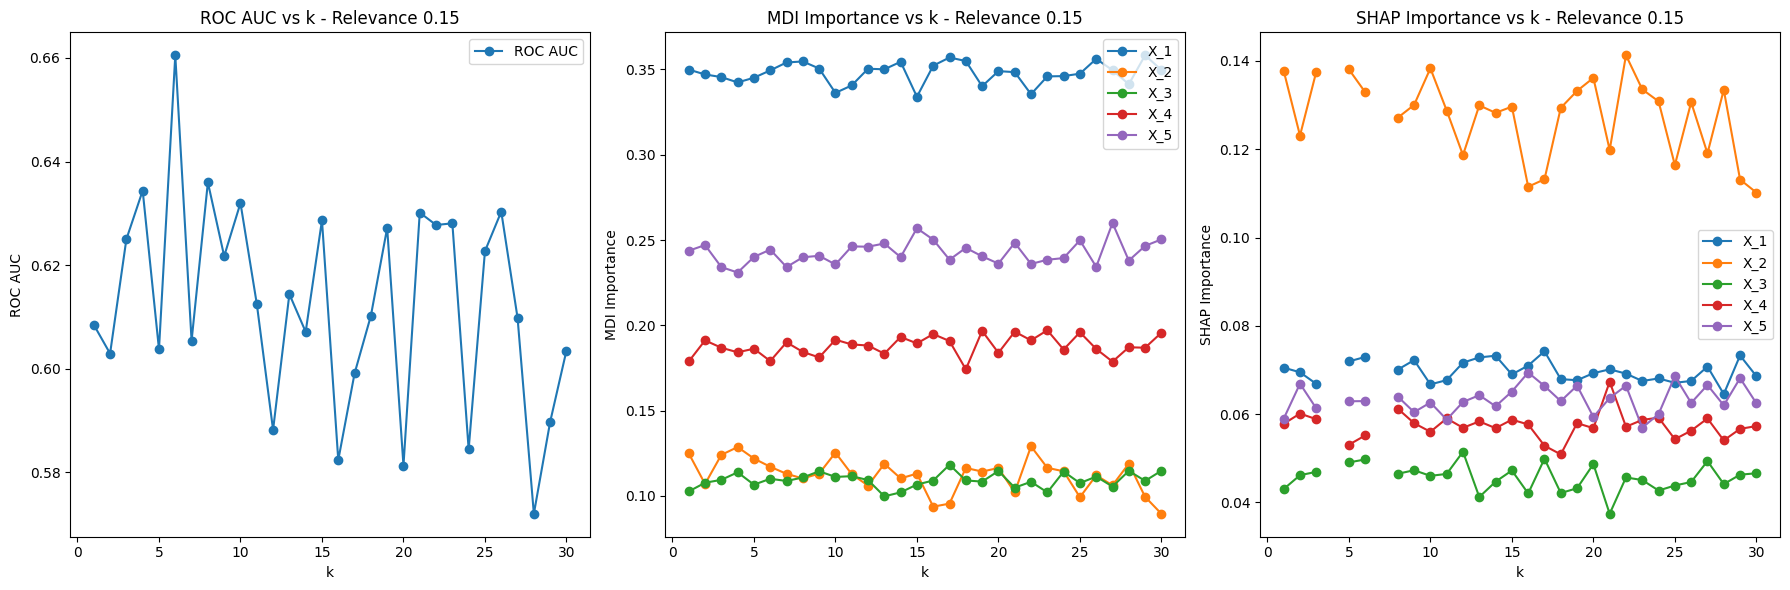

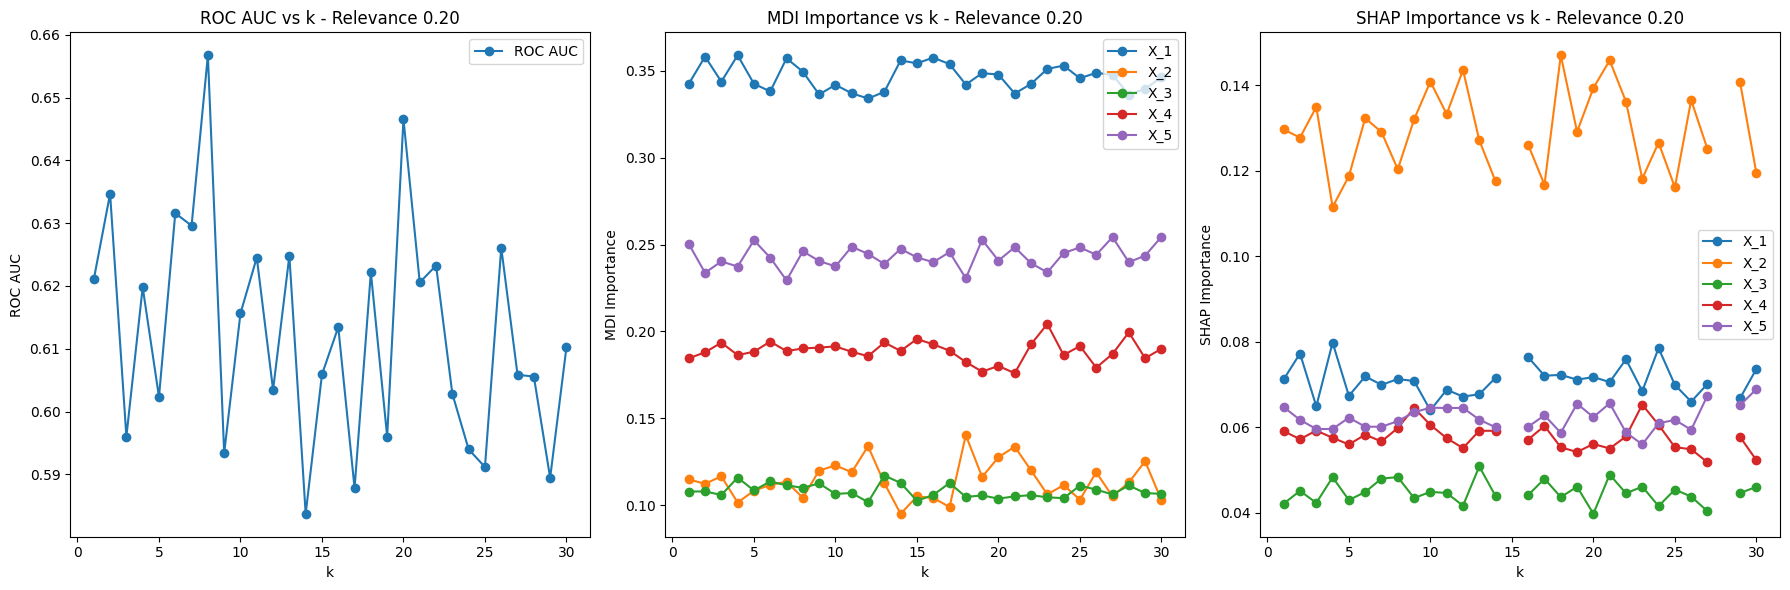

In [10]:
# Plotting results with revised legends and titles
for relevance_result in all_results:
    relevance = relevance_result['relevance']
    plt.figure(figsize=(18, 6))

    ks = [result['k'] for result in relevance_result['results']]
    rocs = [result['roc_auc'] for result in relevance_result['results']]
    mdi_importances = [result['mdi_importances'] for result in relevance_result['results']]
    shap_importances = [result['shap_values'] for result in relevance_result['results']]

    plt.subplot(1, 3, 1)
    plt.plot(ks, rocs, label=f'ROC AUC', marker="o")
    plt.title(f'ROC AUC vs k - Relevance {relevance:.2f}')
    plt.xlabel('k')
    plt.ylabel('ROC AUC')
    plt.legend()

    plt.subplot(1, 3, 2)
    for feature_idx in range(mdi_importances[0].shape[0]):
        mdi_feature_means = [mdi[feature_idx] for mdi in mdi_importances]
        plt.plot(ks, mdi_feature_means, label=f'X_{feature_idx + 1}', marker="o")
    plt.title(f'MDI Importance vs k - Relevance {relevance:.2f}')
    plt.xlabel('k')
    plt.ylabel('MDI Importance')
    plt.legend()

    plt.subplot(1, 3, 3)
    for feature_idx in range(shap_importances[0].shape[0]):
        shap_feature_means = [shap[feature_idx] for shap in shap_importances]
        plt.plot(ks, shap_feature_means, label=f'X_{feature_idx + 1}', marker="o")
    plt.title(f'SHAP Importance vs k - Relevance {relevance:.2f}')
    plt.xlabel('k')
    plt.ylabel('SHAP Importance')
    plt.legend()

    plt.tight_layout()
    plt.show()